# 코로나 데이터로 머신러닝 완벽가이드 복습

[원본 데이터셋]
- https://www.kaggle.com/datasets/meirnizri/covid19-dataset

[진행과정]
- 앞의 10만개 데이터만 이용하여 먼저 분석 진행 (데이터 시각화, 전처리, 모델링)
- 전체 데이터를 이용하여 분석하되, 오버샘플링 현상이 발생하므로, SMOTE 라이브러리를 이용해 오버샘플링 완화

[유의사항] 
- 분석할 때, 전체적으로는 사망자의 비율이 90%가 넘어가지만, 앞의 10만개만 끊어서 진행한다면, 어느정도 생존자 사망자의 균형이 맞음. 그래서 분석은 앞의 10만개 데이터로만 수행

- bool 기능에서 1은 "예"를 의미하고 2는 "아니오"를 의미. 
- 97과 99의 값은 결측 데이터 (98인 경우도 있음)

[학습할 라이브러리]
- 오버샘플링 (SMOTE) : 어느한쪽으로 데이터가 너무 편차가 되어있을 때, 이를 조정하기 위해서 사용 (데이터의 균형을 맞춰주기 위해 사용)
    - 단, 이는 test데이터에서도 사용하면 안되고, train 데이터에서만 사용해야 함.
    
- GridSearchCV : 교차검증 : 최적의 하이퍼 파라미터를 한번에 찾아주는 알고리즘 -> 하이퍼파라미터 최족화
- MinMaxScaler : 데이터 정규화 클래스 중 하나, 넓게 퍼져 있는 데이터를 가장 작은값을 0, 가장 큰 값을 1로 설정하여 변환시킴 (전처리 중에서 많이 사용하는 코드 중 하나)

In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 데이터 가져오기
df = pd.read_csv('Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

### 칼럼에 대한 정보
- USMER : 환자가 1단계, 2단계 또는 3단계의 의료 장치를 치료했는지 여부를 나타냅니다.

- MEDICAL_UNIT : 의료 서비스를 제공하는 국가 보건 시스템의 기관 유형.

- Sex. : 1 - 여성. 2 - 남성.

- PATIENT_TYPE : 환자가 진료실에서 받은 진료 유형 1명은 귀국 후, 2명은 입원 중입니다.

- DATE_DIED : 환자가 사망한 경우 사망 날짜를 표시하고, 그렇지 않은 경우 9999-99-99를 표시합니다.

- INTUBED : 환자가 인공호흡기에 연결되었는지 여부.

- PNEUMONIA : 환자가 이미 공기낭에 염증이 있는지 여부.

- AGE : 환자의 나이.

- PREGNANT. : 환자의 임신 여부에 관계없이

- DIABETES : 그 환자가 당뇨병이 있든 없든

- COPD : 환자가 만성 폐쇄성 폐질환을 앓고 있는지 여부

- ASTHMA : 그 환자가 천식이 있든 없든

- INMSUPR : 환자의 면역력이 저하되었는지 여부.

- HIPERTENSION : 환자가 고혈압인지 아닌지

- OTHER_DISE : 환자가 다른 병을 가지고 있든 없든

- CARDIOVASCULAR : 환자가 심장 또는 혈관과 관련된 질병을 가지고 있는지 여부

- OBESITY : 그 환자가 비만인지 아닌지

- RENAL_CHRONIC : 그 환자가 만성 신장 질환을 가지고 있는지 아닌지

- TOBACCO : 환자가 담배 사용자인지 여부

- CLASIFFICATION_FINAL : 코로나 검사 결과. 데이터 설명 참조

- ICU : 환자가 중환자실에 입원했는지 여부

# ! 실습시에는 10만개만 사용합니다

In [5]:
# 데이터가 너무 많기 때문에, 10만개만 가지고 분석 수행
df = df[:100000]

In [6]:
# 생존자 데이터만 추출
df[df['DATE_DIED']=="9999-99-99"]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,4,2,1,9999-99-99,97,2,32,97,2,...,2,2,2,2,2,2,2,2,3,97
99996,1,4,2,2,9999-99-99,2,2,39,97,2,...,2,2,2,2,2,1,2,1,3,2
99997,2,4,1,1,9999-99-99,97,2,55,2,2,...,2,2,2,2,2,2,2,2,3,97
99998,2,4,2,1,9999-99-99,97,2,42,97,2,...,2,2,2,2,2,2,2,2,3,97


In [7]:
# 생존, 사망 여부 데이터를 가공 (생존했으면 2, 사망했으면 1) - bool에서 사용하던 방법 따름
df['DIED'] = 0
df.loc[df['DATE_DIED'] == "9999-99-99", 'DIED'] = 2
df.loc[df['DATE_DIED'] != "9999-99-99", 'DIED'] = 1

- df.loc[df['DATE_DIED'] == "9999-99-99", 'DIED'] = 2
    - DATE_DIED 칼럼이 9999-99-99일 때, DIED를 2로 바꿔줘라라는 뜻
- df.loc : 데이터프레임 인덱싱 방법
- 참조 사이트 : https://mrlazydev.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-pandas-loc-%EA%B0%9C%EB%85%90%EA%B3%BC-%EC%98%88%EC%A0%9C-%EC%82%AC%EC%9A%A9%EB%B2%95-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%9D%B8%EB%8D%B1%EC%8B%B1%EA%B3%BC-%EC%8A%AC%EB%9D%BC%EC%9D%B4%EC%8B%B1-%EB%B0%A9%EB%B2%95

In [8]:
# 활용한 DATE_DIED 칼럼 제거
df.drop(['DATE_DIED'],axis=1,inplace=True)

## 상관관계 파악

<AxesSubplot: >

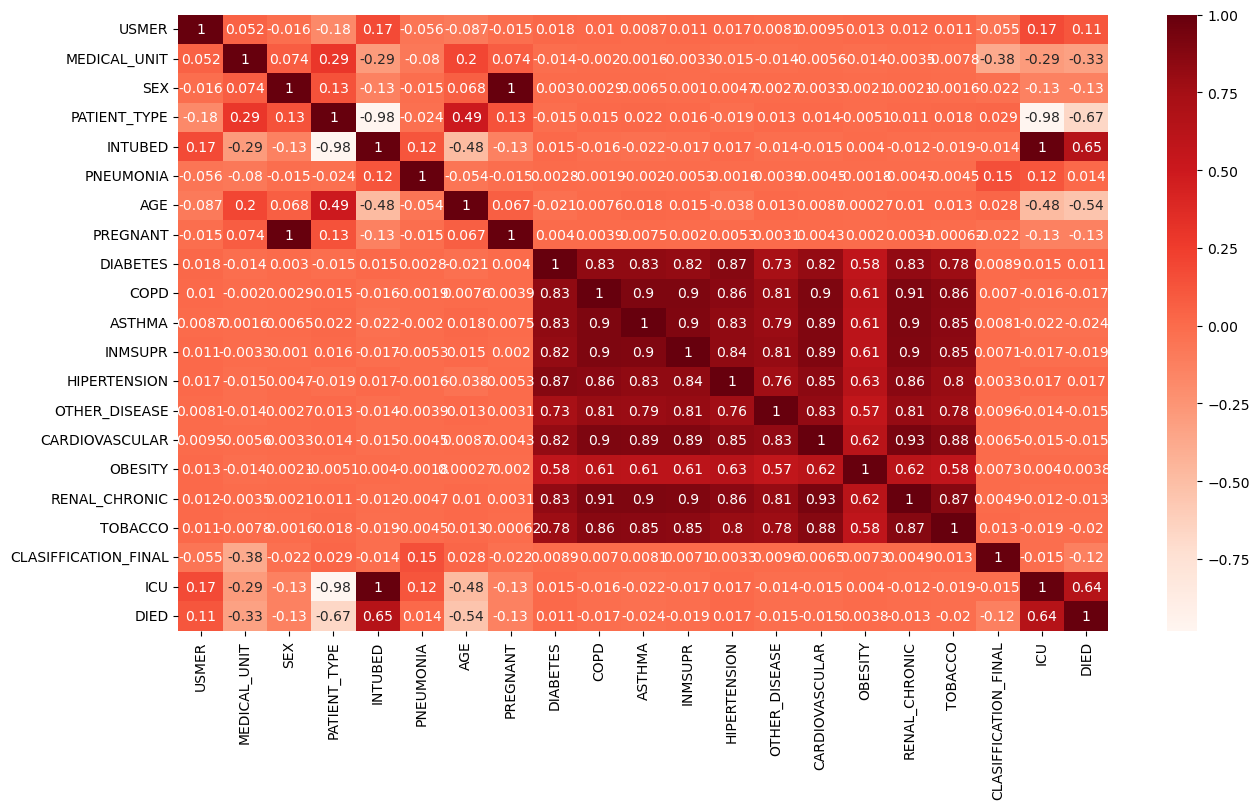

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(), annot = True, cmap = "Reds")

## 시각화

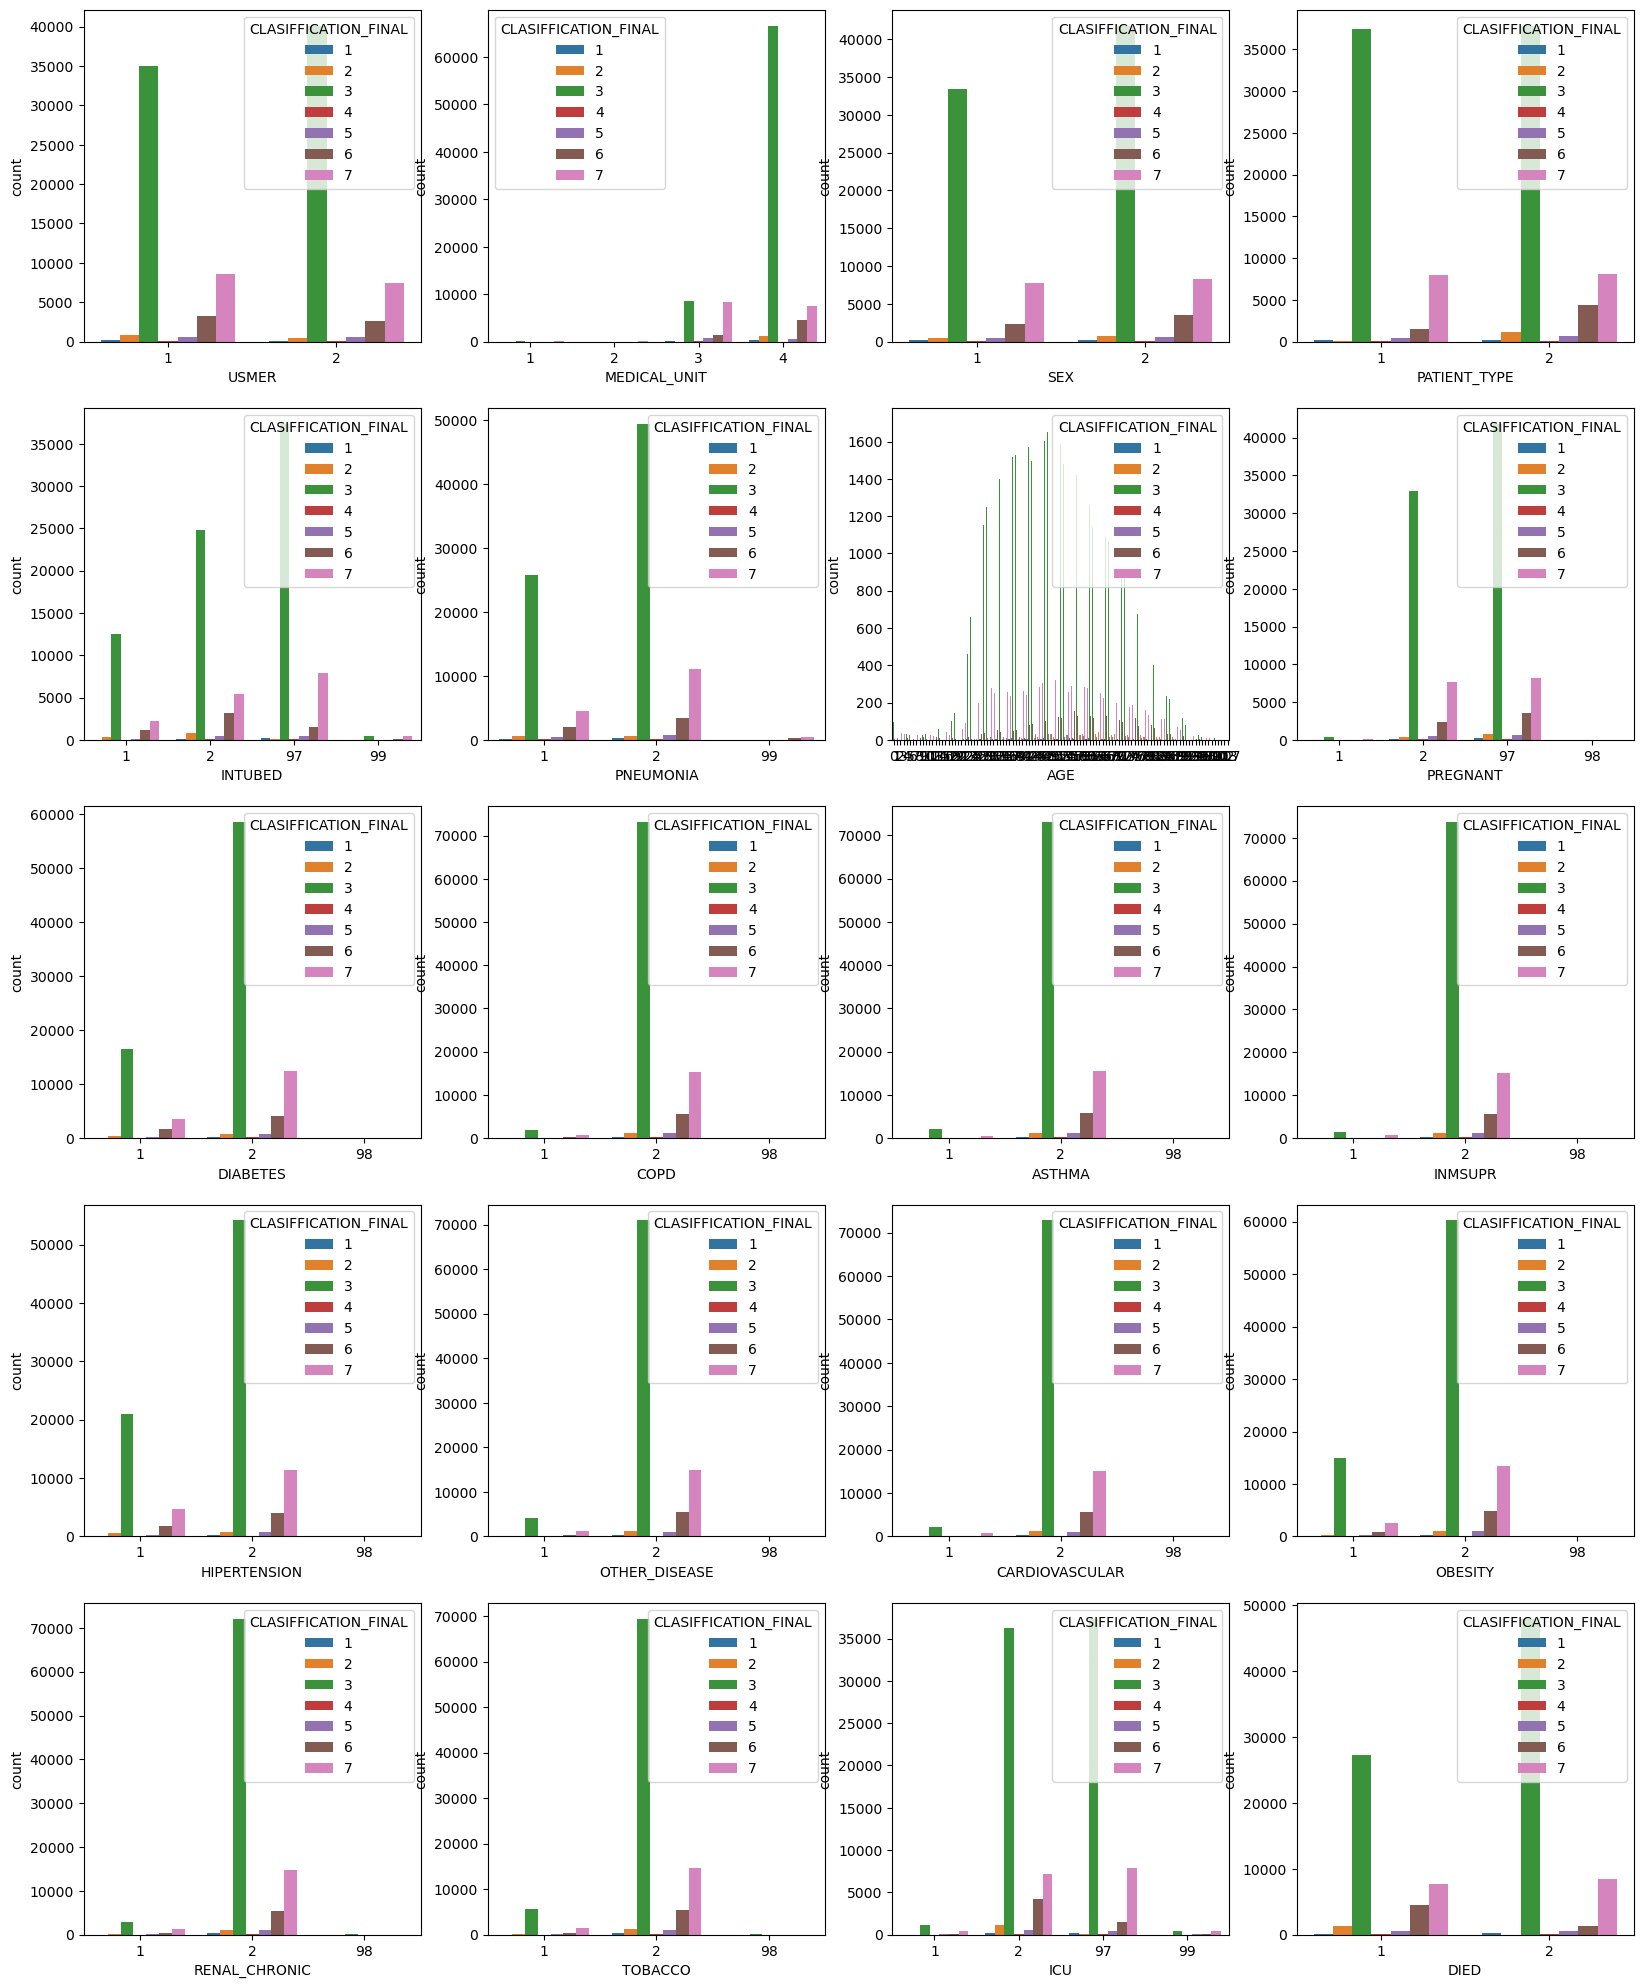

In [10]:
# CLASSIFICATION_FINAL 칼럼과 시각화 비교하여 관계 파악
# 중요도 낮음
plt.figure(figsize=(20, 25))
index = 1
temp = df.drop("CLASIFFICATION_FINAL", axis = 1)

for i in temp.columns:
    plt.subplot(5, 4, index)
    sns.countplot(data=df, x=i, hue="CLASIFFICATION_FINAL")
    index += 1
plt.show()

<AxesSubplot: xlabel='AGE', ylabel='count'>

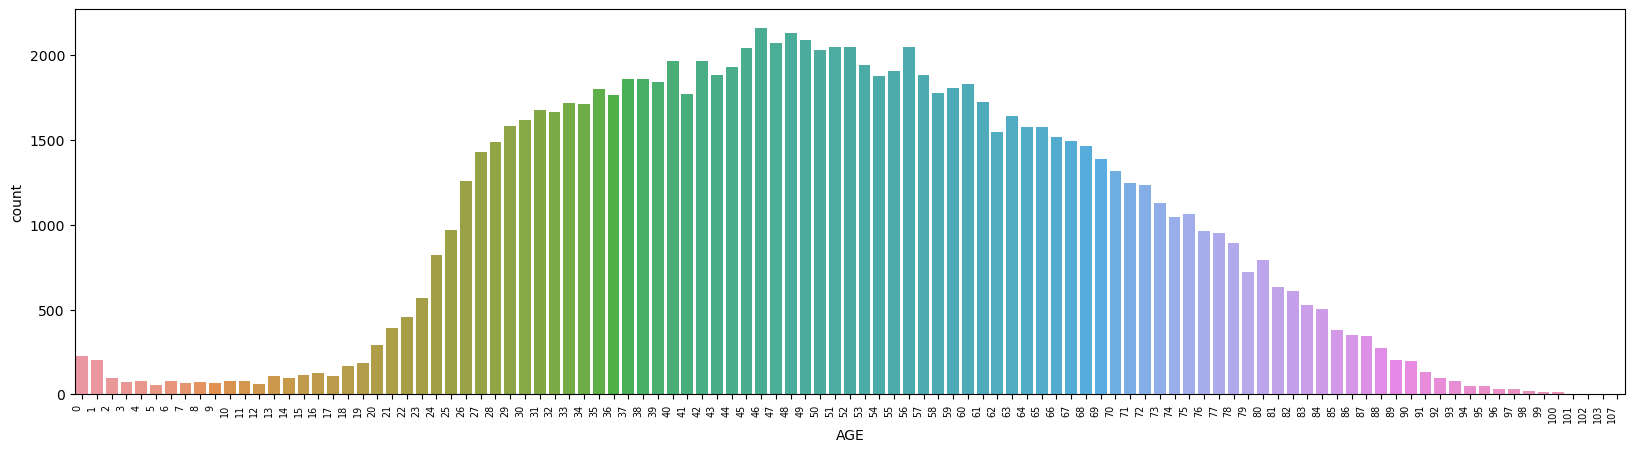

In [11]:
# 나이 분포 파악 (seaborn)
df.head()
plt.figure(figsize=(20,5))
plt.xticks(rotation=90, horizontalalignment='right',fontweight='light',fontsize='x-small' )
sns.countplot(x='AGE', data=df)

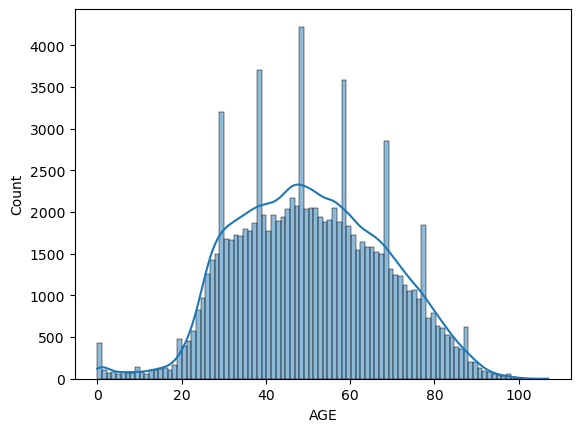

In [13]:
# histplot으로 나이 연령대 파악
sns.histplot(x=df.AGE, kde = True)
plt.show()

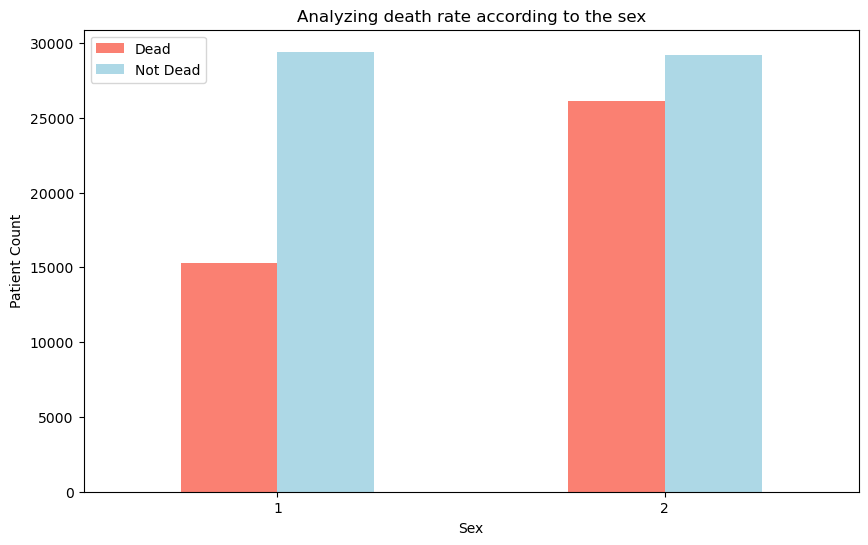

In [15]:
pd.crosstab(df.SEX, df.DIED).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate according to the sex")
plt.xlabel("Sex")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

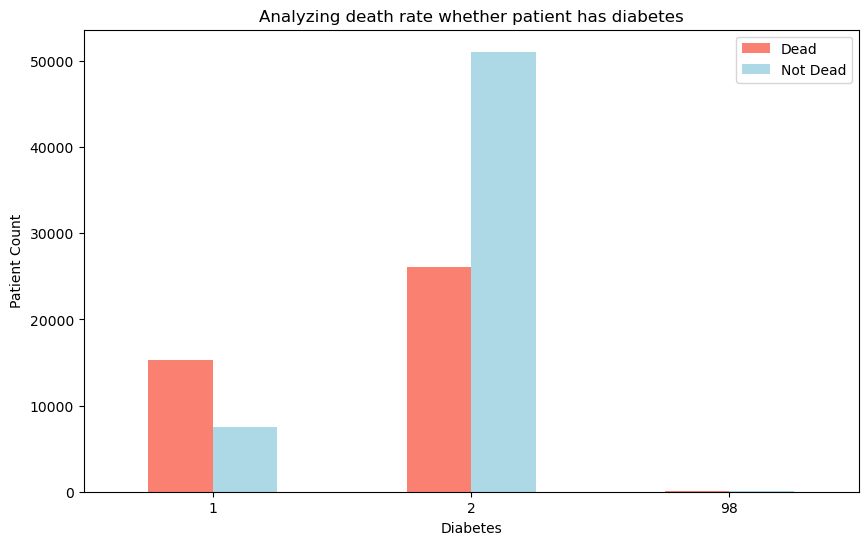

In [16]:
# 당뇨병 여부에 따른 사망 여부
pd.crosstab(df.DIABETES, df.DIED).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

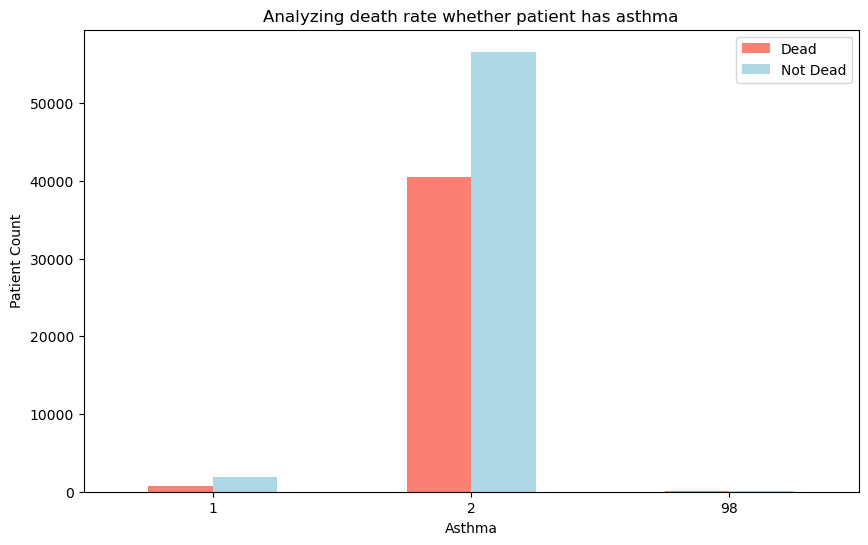

In [17]:
# 천식에 따른 사망 여부
pd.crosstab(df.ASTHMA, df.DIED).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has asthma")
plt.xlabel("Asthma")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

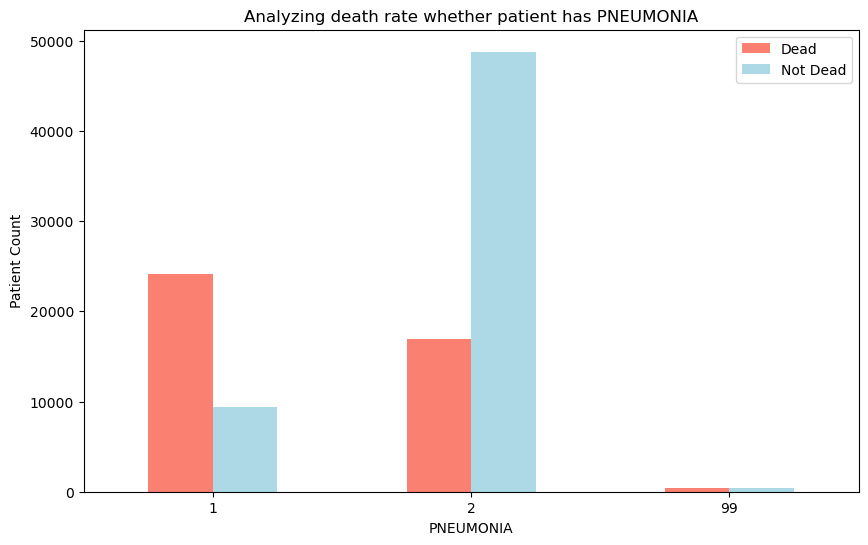

In [18]:
# 공기낭에 염증이 있는지에 따른 사망 생존 구분
pd.crosstab(df.PNEUMONIA, df.DIED).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has PNEUMONIA")
plt.xlabel("PNEUMONIA")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

In [14]:
# 97, 99가 각 칼럼별로 얼마나 적혀있는지 확인하기 위해 모든 칼럼에 대해 value_counts() 수행
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].value_counts())
    print("----------")

USMER
2    51319
1    48681
Name: USMER, dtype: int64
----------
MEDICAL_UNIT
4    80505
3    19175
2      169
1      151
Name: MEDICAL_UNIT, dtype: int64
----------
SEX
2    55304
1    44696
Name: SEX, dtype: int64
----------
PATIENT_TYPE
2    52356
1    47644
Name: PATIENT_TYPE, dtype: int64
----------
INTUBED
97    47644
2     34918
1     16485
99      953
Name: INTUBED, dtype: int64
----------
PNEUMONIA
2     65719
1     33522
99      759
Name: PNEUMONIA, dtype: int64
----------
AGE
46     2163
48     2133
49     2089
47     2072
56     2050
       ... 
100      11
103       1
101       1
107       1
102       1
Name: AGE, Length: 105, dtype: int64
----------
PREGNANT
97    55304
2     44213
1       440
98       43
Name: PREGNANT, dtype: int64
----------
DIABETES
2     77124
1     22724
98      152
Name: DIABETES, dtype: int64
----------
COPD
2     96818
1      3028
98      154
Name: COPD, dtype: int64
----------
ASTHMA
2     97134
1      2711
98      155
Name: ASTHMA, dtype: int64

### 결측치 채워야 할 칼럼
- 결측치가 그렇게 많지 않고, 지장이 없는 경우
- PNEUMONIA, DIABETES, COPD, ASTHMA, INMSUPR, HIPERTENSION, OTHER_DISEASE, CARDIOVASCULAR, OBESITY, RENAL_CHRONIC, TOBACCO

### 제거해야 할 칼럼
- 너무 많은 결측치가 존재하는 경우
- INTUBED, PREGNANT, ICU

In [15]:
# 제거해야 할 칼럼 제거
df.drop(['INTUBED', 'PREGNANT', 'ICU'], axis=1, inplace=True)

In [16]:
# 결측값 채우기 (97, 98, 99)
df2 = df.copy()
fill_list = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
             'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 
             'RENAL_CHRONIC', 'TOBACCO']
null_number = [97, 98, 99]

# 대부분 bool인 경우가 많기 때문에, 최빈값으로 채우기
for i in range(len(fill_list)):
    for j in range(len(null_number)):
        df2[fill_list[i]] = df2[fill_list[i]].replace(null_number[j],int(df2[fill_list[i]].mode()))

In [17]:
# 결측치들이 제대로 채워졌는지 확인
for i in range(len(df2.columns)):
    print(df2.columns[i])
    print(df2[df2.columns[i]].value_counts())
    print("----------")

USMER
2    51319
1    48681
Name: USMER, dtype: int64
----------
MEDICAL_UNIT
4    80505
3    19175
2      169
1      151
Name: MEDICAL_UNIT, dtype: int64
----------
SEX
2    55304
1    44696
Name: SEX, dtype: int64
----------
PATIENT_TYPE
2    52356
1    47644
Name: PATIENT_TYPE, dtype: int64
----------
PNEUMONIA
2    66478
1    33522
Name: PNEUMONIA, dtype: int64
----------
AGE
46     2163
48     2133
49     2089
47     2072
56     2050
       ... 
100      11
103       1
101       1
107       1
102       1
Name: AGE, Length: 105, dtype: int64
----------
DIABETES
2    77276
1    22724
Name: DIABETES, dtype: int64
----------
COPD
2    96972
1     3028
Name: COPD, dtype: int64
----------
ASTHMA
2    97289
1     2711
Name: ASTHMA, dtype: int64
----------
INMSUPR
2    97559
1     2441
Name: INMSUPR, dtype: int64
----------
HIPERTENSION
2    71535
1    28465
Name: HIPERTENSION, dtype: int64
----------
OTHER_DISEASE
2    94293
1     5707
Name: OTHER_DISEASE, dtype: int64
----------
CARDIOV

- 우선 모든 결측치가 다 채워졌습니다.

## 그렇다면 결측치가 채워진 상태에서 다시 시각화를 해볼까요??
- SEX, DIABETES, ASTHMA, PNEUMONIA

In [18]:
# 최종 데이터 확인
df2.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,2,1,1,1,1,65,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,1,2,2,2,1,2,2,2,2,2,3,1
5,2,1,1,2,1,40,2,2,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,2,64,2,2,2,2,2,2,2,2,2,2,3,2
7,2,1,1,1,1,64,1,2,2,1,1,2,2,2,1,2,3,2
8,2,1,1,2,2,37,1,2,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,2,25,2,2,2,2,2,2,2,2,2,2,3,2


## MinMaxScaler

In [19]:
# Age부분만 톡 튀어서 이부분을 조절 (MinMaxScaler 이용)
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()

In [20]:
# MinMaxScaler로 AGE 칼럼 변환
ages = df2[['AGE']]
scaler.fit(ages)
ages_tr = scaler.transform(ages)
df2['AGE'] = ages_tr
df2.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,2,1,1,1,1,0.607477,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,0.672897,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,0.514019,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,0.495327,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,0.635514,1,2,2,2,1,2,2,2,2,2,3,1


- MinMaxScaler 주의점
- 피처 스케일링 클래스는 fit(), transform(), fit_transform()을 일반적으로 이용함
    - fit() : 데이터 변환을 위한 기준 정보 설정을 적용 (학습시킴)
    - transform() : 설정된 정보를 이용해 데이터 변환
    - fit_transform() : fit(), transform()을 한번에 적용시킴
- 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform()해야 함.
    
    → 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 변화시키지 말고, 그대로 테스트 데이터에 적용해야 함.
    
    → 테스트 데이터는 transform()만 수행!!

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

X = df2.drop('DIED', axis=1)
y = df2.DIED

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# 학습 데이터 세트로 예측 수행
from sklearn.metrics import accuracy_score

pred = dt.predict(X_test)
print('예측 정확도 : ',accuracy_score(y_test, pred))

예측 정확도 :  0.84604


## Cross validation

In [23]:
scores = cross_val_score(dt, X, y, scoring = 'accuracy', cv=5)
print('교차 검증별 정확도 : ', np.round(scores, 3))
print('평균 검증 정확도 : ',np.round(np.mean(scores), 3))

교차 검증별 정확도 :  [0.877 0.876 0.84  0.81  0.812]
평균 검증 정확도 :  0.843


## GridSearchCV

- GridSearchCV(estimator, param_grid, scoring, cv, refit=True, n_jobs...) 등으로 구성

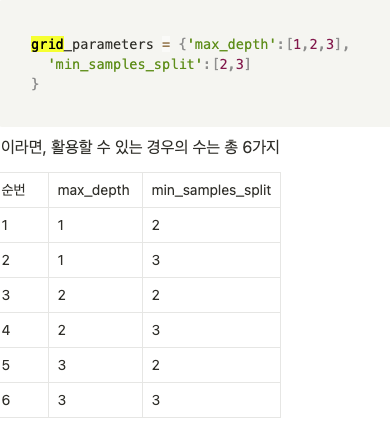

- GridSearchCV 주요 파라미터
    - estimator : classifier, regressor, pipeline
    - param_grid : key + 리스트 값을 지니는 딕셔너리가 주어짐
    - scoring : 예측 성능을 평가하는 방식
    - cv : 교차 검증을 위해 분할되는 학습 / 테스트 세트의 개수 지정
    - refit : 디폴트는 true, 입력 시 가장 최적의 하이퍼 파라미터를찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습
    - n_jobs(추가) : 디폴트 값은 1인데 이 값을 증가시키면 내부적으로 멀티 프로세스를 사용하여 그리드서치를 수행한다. 만약 CPU 코어의 수가 충분하다면 `n_jobs`를 늘릴 수록 속도가 증가
- 그렇다면 최고 성능이 어떤 것인지 확인하는 방법은?
    - best_params_, best_score_에 기록됨. (최적 파라미터, 최고 정확도 순서)
    - best_estimator_ : 최고의 결과를 내는 학습된 estimator 반환 → 이는 별도 학습이 필요없음

In [24]:
# 파라미터 지정
parameters = {'max_depth':[5,6,7,8,9,10],
             'min_samples_leaf':[5,10,20,30,40,50]}

In [25]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(dt, param_grid = parameters, cv = 5, refit=True)

gs.fit(X_train, y_train)

scores_df = pd.DataFrame(gs.cv_results_)
scores_df[['params','mean_test_score','rank_test_score',
          'split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 5, 'min_samples_leaf': 5}",0.862440,36,0.858733,0.864867,0.860267
1,"{'max_depth': 5, 'min_samples_leaf': 10}",0.862467,31,0.858867,0.864867,0.860267
2,"{'max_depth': 5, 'min_samples_leaf': 20}",0.862467,31,0.858867,0.864867,0.860267
3,"{'max_depth': 5, 'min_samples_leaf': 30}",0.862467,31,0.858867,0.864867,0.860267
4,"{'max_depth': 5, 'min_samples_leaf': 40}",0.862467,31,0.858867,0.864867,0.860267
5,"{'max_depth': 5, 'min_samples_leaf': 50}",0.862467,31,0.858867,0.864867,0.860267
6,"{'max_depth': 6, 'min_samples_leaf': 5}",0.866907,27,0.861733,0.868533,0.868933
7,"{'max_depth': 6, 'min_samples_leaf': 10}",0.866933,26,0.861867,0.868533,0.868933
8,"{'max_depth': 6, 'min_samples_leaf': 20}",0.866747,28,0.861933,0.868533,0.868600
9,"{'max_depth': 6, 'min_samples_leaf': 30}",0.866680,30,0.861933,0.868267,0.868533


In [27]:
print('GridSearchCV 최적 파라미터:', gs.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(gs.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 9, 'min_samples_leaf': 10}
GridSearchCV 최고 정확도: 0.8711


In [28]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = gs.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 되었으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.8698


# 오버샘플링 적용하기

In [29]:
# 데이터 가져오기
df = pd.read_csv('Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [30]:
df.shape

(1048575, 21)

In [31]:
# 생존, 사망 여부 데이터를 가공 (생존했으면 2, 사망했으면 1) - bool에서 사용하던 방법 따름
df['DIED'] = 0
df.loc[df['DATE_DIED'] == "9999-99-99", 'DIED'] = 1
df.loc[df['DATE_DIED'] != "9999-99-99", 'DIED'] = 0

In [32]:
df['DIED'].value_counts()

1    971633
0     76942
Name: DIED, dtype: int64

In [33]:
# 활용한 DATE_DIED 칼럼 제거
df.drop(['DATE_DIED'],axis=1,inplace=True)

In [34]:
# 97, 99가 각 칼럼별로 얼마나 적혀있는지 확인하기 위해 모든 칼럼에 대해 value_counts() 수행
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].value_counts())
    print("----------")

USMER
2    662903
1    385672
Name: USMER, dtype: int64
----------
MEDICAL_UNIT
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64
----------
SEX
1    525064
2    523511
Name: SEX, dtype: int64
----------
PATIENT_TYPE
1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64
----------
INTUBED
97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64
----------
PNEUMONIA
2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64
----------
AGE
30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64
----------
PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64
----------
DIABETES
2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64
-

In [35]:
# 제거해야 할 칼럼 제거
df.drop(['INTUBED', 'PREGNANT', 'ICU'], axis=1, inplace=True)

In [36]:
# 결측값 채우기 (97, 98, 99)
fill_list = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
             'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 
             'RENAL_CHRONIC', 'TOBACCO']
null_number = [97, 98, 99]

# 대부분 bool인 경우가 많기 때문에, 최빈값으로 채우기
for i in range(len(fill_list)):
    for j in range(len(null_number)):
        df[fill_list[i]] = df[fill_list[i]].replace(null_number[j],int(df[fill_list[i]].mode()))

In [37]:
# 97, 99가 각 칼럼별로 얼마나 적혀있는지 확인하기 위해 모든 칼럼에 대해 value_counts() 수행
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].value_counts())
    print("----------")

USMER
2    662903
1    385672
Name: USMER, dtype: int64
----------
MEDICAL_UNIT
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64
----------
SEX
1    525064
2    523511
Name: SEX, dtype: int64
----------
PATIENT_TYPE
1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64
----------
PNEUMONIA
2    908537
1    140038
Name: PNEUMONIA, dtype: int64
----------
AGE
30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64
----------
DIABETES
2    923586
1    124989
Name: DIABETES, dtype: int64
----------
COPD
2    1033513
1      15062
Name: COPD, dtype: int64
----------
ASTHMA
2    1017003
1      31572
Name: ASTHMA, dtype: int64
----------
INMSUPR
2    1034405
1      14170
Name: INMSUPR, dtype: int64
----------
HIPERTENS

In [38]:
# Age부분만 톡 튀어서 이부분을 조절 (MinMaxScaler 이용)
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 AGE 칼럼 변환
ages = df[['AGE']]
scaler.fit(ages)
ages_tr = scaler.transform(ages)
df['AGE'] = ages_tr
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,2,1,1,1,1,0.537190,2,2,2,2,1,2,2,2,2,2,3,0
1,2,1,2,1,1,0.595041,2,2,2,2,1,2,2,1,1,2,5,0
2,2,1,2,2,2,0.454545,1,2,2,2,2,2,2,2,2,2,3,0
3,2,1,1,1,2,0.438017,2,2,2,2,2,2,2,2,2,2,7,0
4,2,1,2,1,2,0.561983,1,2,2,2,1,2,2,2,2,2,3,0


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

X = df.drop('DIED', axis=1)
y = df.DIED

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [40]:
!pip install -U imbalanced-learn

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (786431, 17) (786431,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (1457272, 17) (1457272,)
SMOTE 적용 후 레이블 값 분포: 
 1    728636
0    728636
Name: DIED, dtype: int64


- SMOTE : 오버샘플링이 발생할 때 사용하는 기법

- 오버샘플링이란? : 데이터가 불균형한 분포를 가진 데이터일때 예측 성능 문제가 발생할 수 있음. (적은 데이터 세트를 증식해 학습을 위한 충분한 데이터를 확보하는 방안)

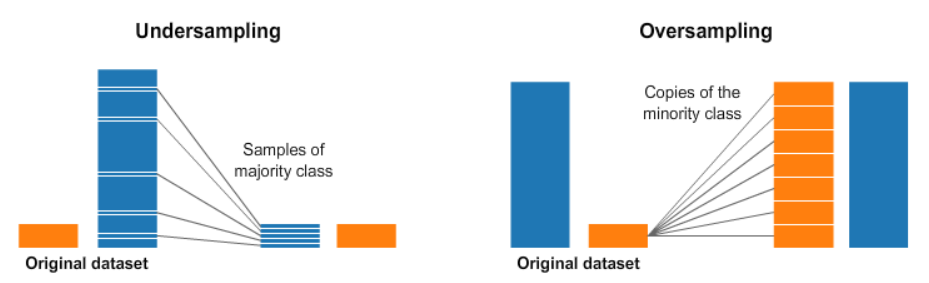

    - 동일 데이터 증식은 과적합을 유발하기에, 원본 데이터의 피처 값들을 아주 약간만 변경해 증식함
    - SMOTE가 대표적임 : 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃을 찾아서 이 데이터와 K개의 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터 생성

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=156)

dt.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=156)

In [43]:
pred = dt.predict(X_test)
accuracy_score(y_test, pred)

0.9149742126464844

Feature importances:
[0.011 0.029 0.01  0.659 0.063 0.153 0.01  0.004 0.003 0.003 0.01  0.005
 0.004 0.008 0.005 0.006 0.019]
USMER : 0.011
MEDICAL_UNIT : 0.029
SEX : 0.010
PATIENT_TYPE : 0.659
PNEUMONIA : 0.063
AGE : 0.153
DIABETES : 0.010
COPD : 0.004
ASTHMA : 0.003
INMSUPR : 0.003
HIPERTENSION : 0.010
OTHER_DISEASE : 0.005
CARDIOVASCULAR : 0.004
OBESITY : 0.008
RENAL_CHRONIC : 0.005
TOBACCO : 0.006
CLASIFFICATION_FINAL : 0.019


<AxesSubplot: >

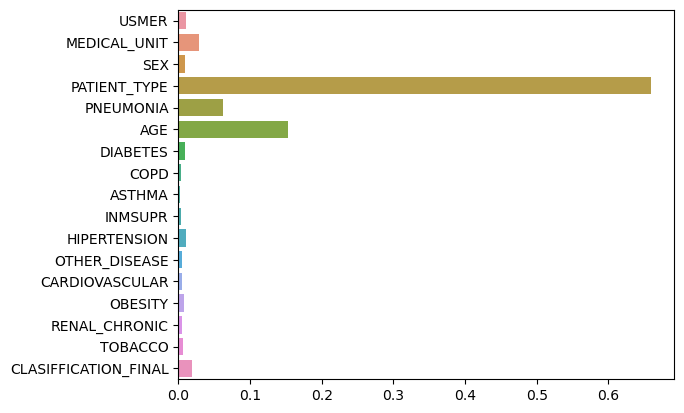

In [44]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(X.columns , dt.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt.feature_importances_ , y=X.columns)